# Retail Sales: Beer, Wine, and Liquor Stores
U.S. Census Bureau, Retail Sales: Beer, Wine, and Liquor Stores [MRTSSM4453USN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/MRTSSM4453USN, June 24, 2019.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Retail Sale Beer Wine Liquor.csv",index_col='DATE',parse_dates=True)
df.rename(columns={"MRTSSM4453USN": "Millions of Dollars"},inplace=True)

In [3]:
df.head()

Millions of Dollars
DATE                           
1992-01-01                 1509
1992-02-01                 1541
1992-03-01                 1597
1992-04-01                 1675
1992-05-01                 1822

In [4]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01', '2019-01-01', '2019-02-01',
               '2019-03-01', '2019-04-01'],
              dtype='datetime64[ns]', name='DATE', length=328, freq='MS')

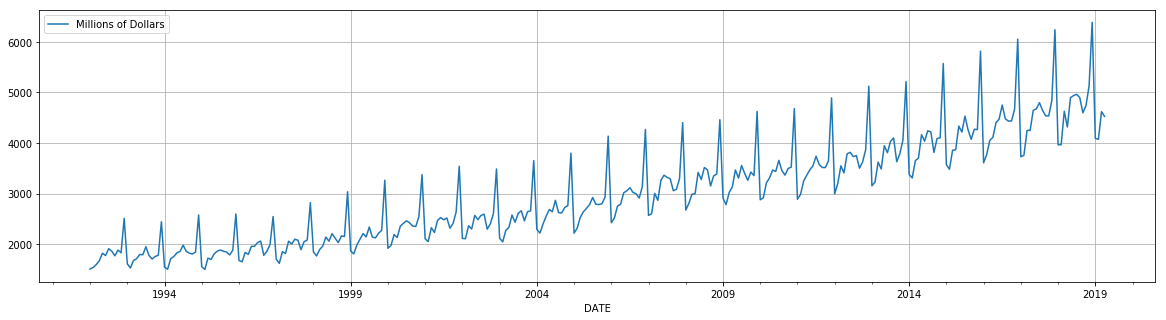

In [5]:
df.plot(figsize=(20,5),grid=True);

## ETS Decomposition

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

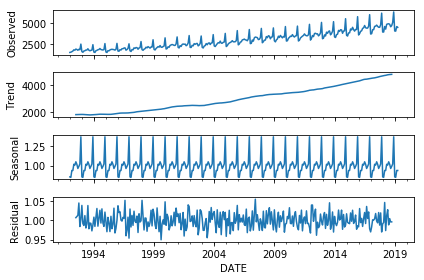

In [7]:
result = seasonal_decompose(df['Millions of Dollars'],model='mul')
result.plot();

## Moving Average
### SMA
#### Simple Moving Average

In [8]:
df['SMA_6'] = df['Millions of Dollars'].rolling(window=6).mean()
df['SMA_12'] = df['Millions of Dollars'].rolling(window=12).mean()

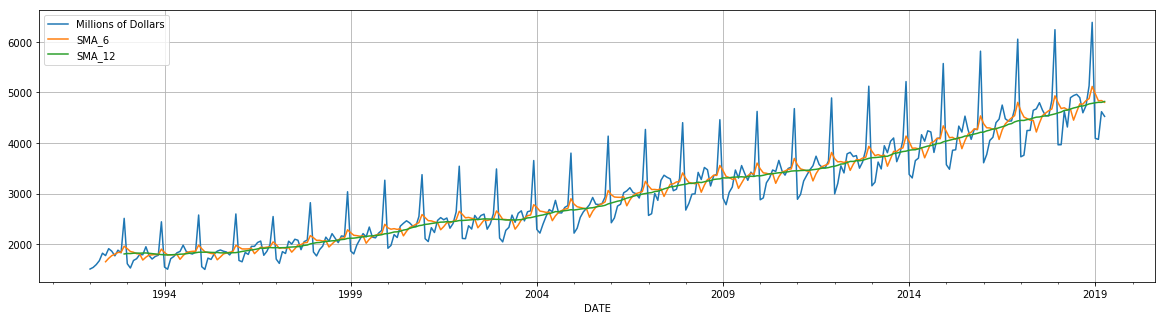

In [9]:
df.plot(figsize=(20,5),grid=True);

### EWMA
#### Exponential Weighted Moving Average

In [10]:
df['EMW_12'] = df['Millions of Dollars'].ewm(span=12,adjust=False).mean()

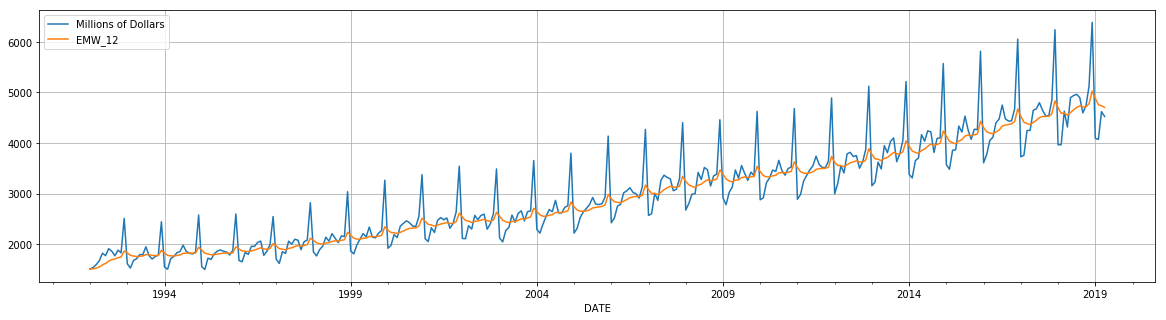

In [11]:
df[['Millions of Dollars','EMW_12']].plot(figsize=(20,5),grid=True);

### Compare SMA to EWMA

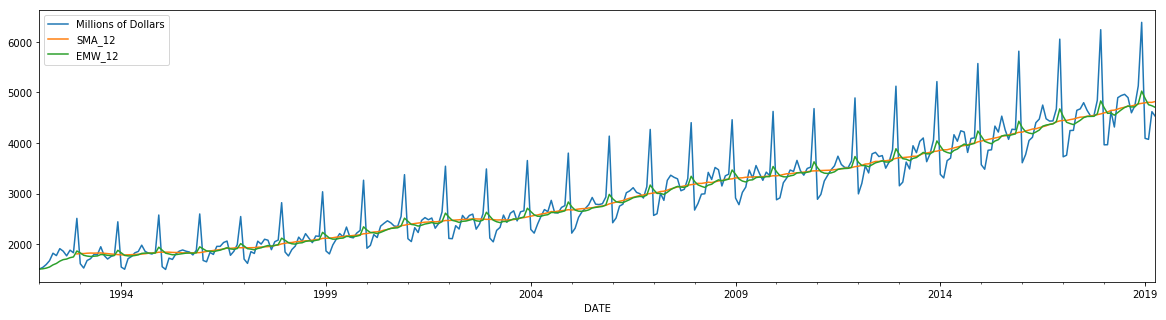

In [12]:
df[['Millions of Dollars','SMA_12','EMW_12']].plot(figsize=(20,5)).autoscale(axis='x',tight=True)

Compare duay residual , evaluate model

## Holt-Winters Methods
### SES
#### Simple Exponential Smoothing

Pai doo wa alpha and beta kue rai

In [13]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [14]:
span = 12
alpha = 2/(span+1)
model = SimpleExpSmoothing(df['Millions of Dollars'])
fitted_model = model.fit(smoothing_level=alpha,optimized=False)
df['SES12'] = fitted_model.fittedvalues.shift(-1)
# df['SES12']=SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)

<div class="alert alert-danger"><strong>NOTE:</strong> For some reason, when <tt>optimized=False</tt> is passed into <tt>.fit()</tt>, the statsmodels <tt>SimpleExpSmoothing</tt> function shifts fitted values down one row. We fix this by adding <tt>.shift(-1)</tt> after <tt>.fittedvalues</tt></div>

In [15]:
df.head()

Millions of Dollars  SMA_6  SMA_12       EMW_12        SES12
DATE                                                                    
1992-01-01                 1509    NaN     NaN  1509.000000  1509.000000
1992-02-01                 1541    NaN     NaN  1513.923077  1513.923077
1992-03-01                 1597    NaN     NaN  1526.704142  1526.704142
1992-04-01                 1675    NaN     NaN  1549.518889  1549.518889
1992-05-01                 1822    NaN     NaN  1591.439060  1591.439060

### DES
#### Double Exponential Smoothing

In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [17]:
df['DES_add12'] = ExponentialSmoothing(df['Millions of Dollars'].astype(np.float),trend='add').fit().fittedvalues.shift(-1)
#df['DESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)

C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:710: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


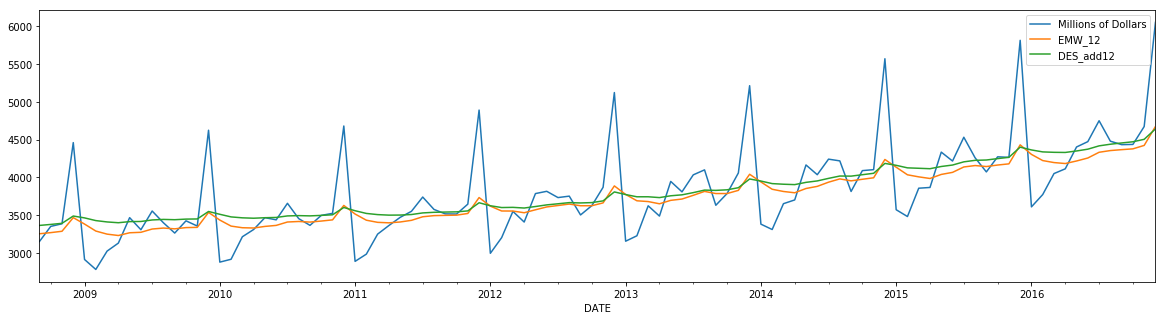

In [18]:
df[['Millions of Dollars','EMW_12','DES_add12']].iloc[200:300].plot(figsize=(20,5)).autoscale(axis='x',tight=True)

In [19]:
df['DES_mul12'] = ExponentialSmoothing(df['Millions of Dollars'].astype(np.float),trend='mul').fit().fittedvalues.shift(-1)

C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:710: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


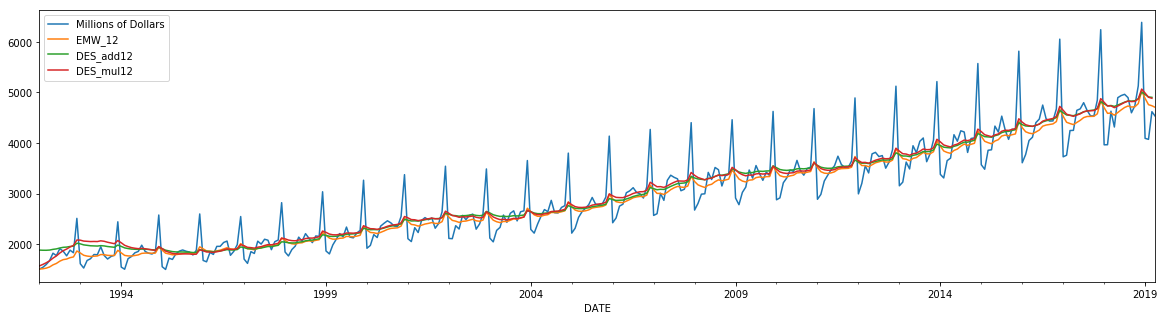

In [20]:
df[['Millions of Dollars','EMW_12','DES_add12','DES_mul12']].plot(figsize=(20,5)).autoscale(axis='x',tight=True)

### TES
#### Triple Exponential Smoothing

In [21]:
df['TES_add12'] = ExponentialSmoothing(df['Millions of Dollars'].astype(np.float),trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues.shift(0)

In [22]:
df['TES_mul12'] = ExponentialSmoothing(df['Millions of Dollars'].astype(np.float),trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues.shift(0)

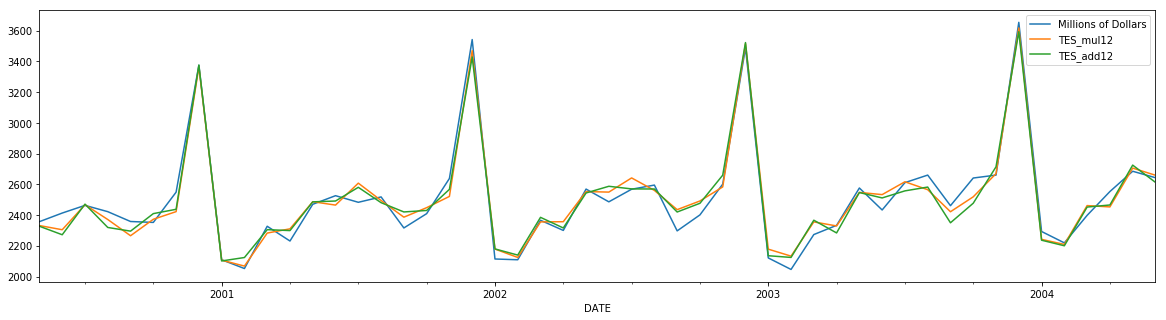

In [23]:
df[['Millions of Dollars','TES_mul12','TES_add12']].iloc[100:150].plot(figsize=(20,5)).autoscale(axis='x',tight=True)

In [24]:
df.head()

Millions of Dollars  SMA_6  SMA_12       EMW_12        SES12  \
DATE                                                                       
1992-01-01                 1509    NaN     NaN  1509.000000  1509.000000   
1992-02-01                 1541    NaN     NaN  1513.923077  1513.923077   
1992-03-01                 1597    NaN     NaN  1526.704142  1526.704142   
1992-04-01                 1675    NaN     NaN  1549.518889  1549.518889   
1992-05-01                 1822    NaN     NaN  1591.439060  1591.439060   

              DES_add12    DES_mul12    TES_add12    TES_mul12  
DATE                                                            
1992-01-01  1883.848724  1569.877445  1518.813983  1522.426383  
1992-02-01  1880.537190  1599.370016  1519.823491  1500.948354  
1992-03-01  1880.022807  1632.296330  1616.543794  1659.980312  
1992-04-01  1884.088967  1671.233092  1670.414498  1665.543800  
1992-05-01  1898.097561  1724.325498  1799.186256  1800.569312

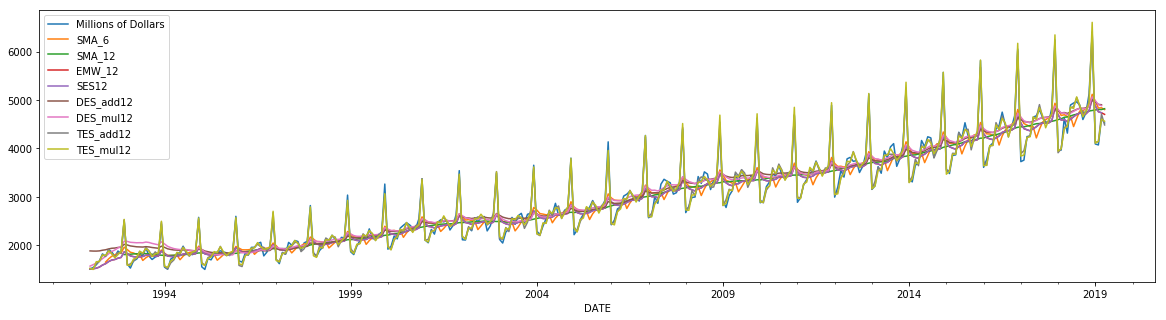

In [25]:
df.plot(figsize=(20,5));

## Forecasting with the Holt-Winters Method

In [26]:
train_data = df.iloc[:268]
test_data = df.iloc[268:]

In [27]:
fitted_model_add = ExponentialSmoothing(train_data['Millions of Dollars'].astype(np.float),trend='add',seasonal='add',seasonal_periods=12).fit()
fitted_model_mul = ExponentialSmoothing(train_data['Millions of Dollars'].astype(np.float),trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [28]:
test_predictions_add = fitted_model_add.forecast(60).rename('HW Forecast add')
test_predictions_mul = fitted_model_mul.forecast(60).rename('HW Forecast mul')

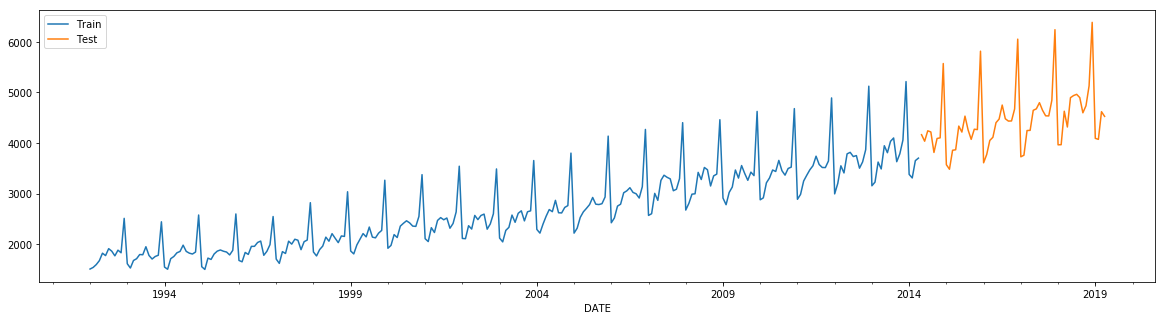

In [29]:
train_data['Millions of Dollars'].plot(legend=True,label='Train')
test_data['Millions of Dollars'].plot(legend=True,label='Test',figsize=(20,5));

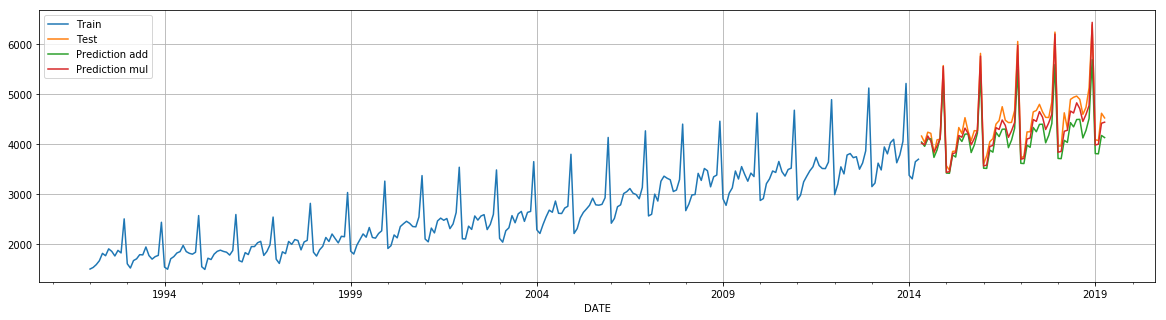

In [30]:
train_data['Millions of Dollars'].plot(legend=True,label='Train',figsize=(20,5))
test_data['Millions of Dollars'].plot(legend=True,label='Test');
test_predictions_add.plot(legend=True,label='Prediction add')
test_predictions_mul.plot(legend=True,label='Prediction mul',grid=True)

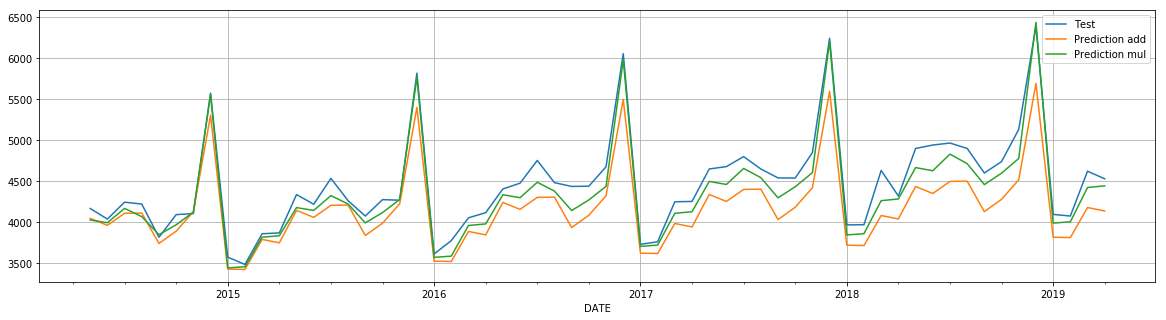

In [31]:
test_data['Millions of Dollars'].plot(legend=True,label='Test');
test_predictions_add.plot(legend=True,label='Prediction add')
test_predictions_mul.plot(legend=True,label='Prediction mul',figsize=(20,5),grid=True)

#### Multiplicative model is a better model here 

## Evaluation Metrics

In [32]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [33]:
eva_test_data = test_data[['Millions of Dollars']]

In [34]:
mean_absolute_error(eva_test_data,test_predictions_mul)

128.66256926067481

In [35]:
mean_squared_error(eva_test_data,test_predictions_mul)

23882.053832516223

In [36]:
np.sqrt(mean_squared_error(eva_test_data,test_predictions_mul))

154.5381953839122

In [37]:
eva_test_data['Millions of Dollars'].describe()

count      60.000000
mean     4461.650000
std       607.028155
min      3482.000000
25%      4085.750000
50%      4369.000000
75%      4674.500000
max      6386.000000
Name: Millions of Dollars, dtype: float64

## Forecasting into Future

In [38]:
final_model = ExponentialSmoothing(df['Millions of Dollars'].astype(np.float),trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [39]:
forecast_predictions = final_model.forecast(60)

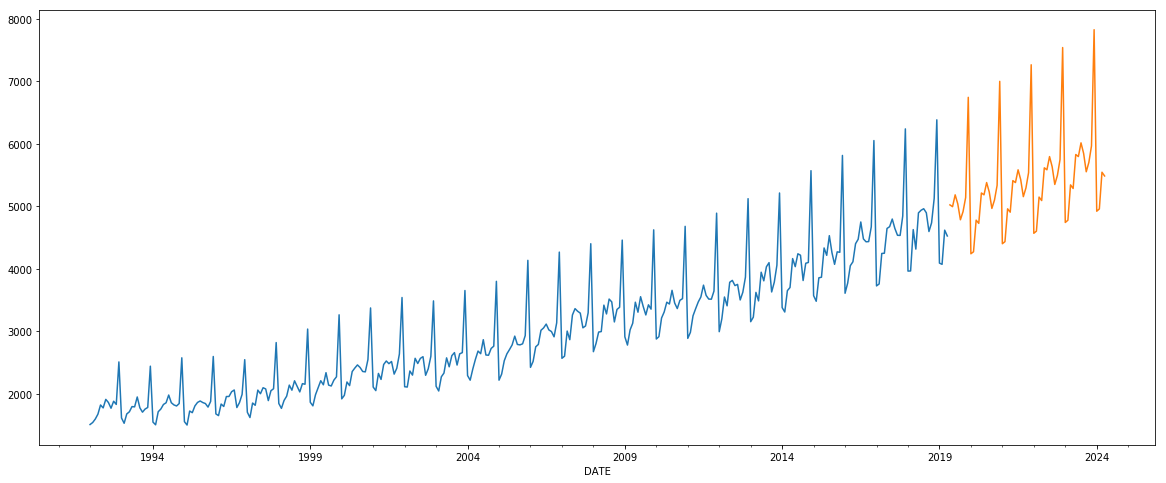

In [40]:
df['Millions of Dollars'].plot(figsize=(20,8))
forecast_predictions.plot();